# Predict

1. Используемый датасет: GTZAN dataset.  
http://marsyasweb.appspot.com/download/data_sets/
2. Используемый алгоритм для экстракции фич: mfcc - более подробно в комментариях  
Библиотека: python_speech_features 

---

**Что еще нужно?  **
  - Бороться с переобучением

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from copy import copy

import python_speech_features as psf
import sunau
import librosa as lb

from sklearn.preprocessing import LabelEncoder

In [53]:
#Проверим загружаемость
audio_files_load = pd.read_csv('dataset.csv',index_col=0, sep=",", dtype=object)
audio_files_load

,genre,file_name,samplerate,duration,mean,std,max,min,diff_mean,diff_std
0,blues,blues.00000.au,22050,30,[ -1.50538264 -1.66745918 -15.21220703 4.23...,[ 1.14202743 6.01268043 8.70403617 9.26...,[ 1.01400399 13.70942565 11.68709764 29.98...,[ -4.85854815 -26.57615926 -42.66757796 -28.61...,[ -1.62076547e-01 -1.35447478e+01 1.9444190...,[ 6.11997806 12.51046351 11.42995379 11.04...
1,blues,blues.00001.au,22050,30,[ -3.27341626e+00 8.52053789e-01 -2.8907873...,[ 2.1263558 8.1618835 12.70405381 12.34...,[ 1.23421579 24.11494854 25.19993601 36.74...,[ -9.67297876 -32.81133142 -51.11621653 -34.84...,[ 4.12547005 -3.74284114 7.23281575 -11.75...,[ 9.13983632 16.90063541 17.14793627 13.05...
2,blues,blues.00002.au,22050,30,[ -9.43213843e-01 3.49022076e+00 -1.8450147...,[ 1.30325969 7.3102339 9.75454936 9.58...,[ 1.94451093 30.92381031 17.56145658 42.21...,[ -7.1497022 -42.67495042 -47.42781209 -27.95...,[ 4.43343461e+00 -2.19403685e+01 1.8106328...,[ 7.93639193 12.67006977 11.11101465 14.64...
3,blues,blues.00003.au,22050,30,[ -3.39170231 9.25209884 -4.38120259 4.95...,[ 1.56811584 7.69374057 8.64939629 8.37...,[ 0.50526175 35.59888198 17.72606136 30.46...,[ -7.70663011 -21.78396563 -39.60813859 -23.36...,[ 12.64380114 -13.63330142 9.33408447 -13.09...,[ 8.32276957 12.48046539 10.38500642 11.23...
4,blues,blues.00004.au,22050,30,[ -1.96142936 0.93701381 -23.26517463 -1.32...,[ 1.88318814 9.51916117 8.22781382 9.36...,[ 2.68423869 22.249557 1.29087329 38.57...,[ -7.535371 -41.6089841 -48.90922228 -25.54...,[ 2.89844317 -24.20218844 21.94310662 -28.03...,[ 10.80234986 11.22449014 13.26978398 14.48...
5,blues,blues.00005.au,22050,30,[ -2.13538871e+00 2.49841696e+00 -1.5173896...,[ 2.25315092 14.84154267 9.90401463 13.59...,[ 3.47138862 28.17259348 19.8527738 54.43...,[ -9.04380414 -49.37085582 -38.34012376 -27.59...,[ 4.63380566e+00 -1.76723130e+01 1.9613831...,[ 16.31270029 18.18994887 15.27220357 15.75...
6,blues,blues.00006.au,22050,30,[ -2.11225679e+00 1.16528963e+01 -2.3602408...,[ 2.72318955 13.40692334 13.2523132 12.91...,[ 2.61813792 36.94733324 13.85641005 52.86...,[ -9.94682459 -38.51996341 -57.14388972 -25.54...,[ 1.37651531e+01 -3.52553045e+01 2.9949698...,[ 14.76822598 18.59751124 16.45676792 26.70...
7,blues,blues.00007.au,22050,30,[ -2.247435 7.78380454 -17.76835974 10.48...,[ 2.00717232 11.65265969 9.51996303 11.90...,[ 2.99191514 35.65089431 13.80784292 48.93...,[ -8.64027198 -43.22825191 -40.72101698 -19.46...,[ 10.03123954 -25.55216428 28.24869893 -16.54...,[ 12.66031083 14.91058721 13.48389568 18.47...
8,blues,blues.00008.au,22050,30,[ -1.55594314 -1.90990755 -11.38929456 8.59...,[ 1.09042461 6.6980525 9.92288305 11.06...,[ 0.95790908 14.38290344 9.51101863 50.40...,[ -4.98870974 -31.22306622 -47.387254 -19.01...,[ -0.35396441 -9.47938701 19.9841269 -15.15...,[ 6.94523319 15.00788849 10.85616022 15.11...
9,blues,blues.00009.au,22050,30,[ -3.07371572e+00 -3.31702137e-01 -1.2556826...,[ 2.346827 7.72442004 11.50908304 11.84...,[ 2.44348114 20.08284787 12.96071091 58.16...,[ -7.20556381 -46.29555427 -43.11173933 -20.41...,[ 2.74201358 -12.2251245 19.50174608 -32.45...,[ 8.17247535 15.69222587 16.59228327 17.83...


In [54]:
audio_files_load.iloc[:, 4:10] = audio_files_load.iloc[:, 4:10].applymap(StringToList)

In [55]:
# Процессинг датасета
def StringToList(string):
    string = string.replace("\n", "")
    string = string[1:-1] # Убираем квадратные скобки

    result = list()
    for s in string.split(" "):
        if s == "":
            continue
        else:
            result.append(float(s))

    return result

In [56]:
def prepare_data(data):
    X = data.iloc[:,[4,5,6,7,8,9]].values
    y = data.iloc[:,0]
    
    res = list()
    for x in X:
        res_prep = list()
        for element in x:
            res_prep += element
        res.append(res_prep)
    X = np.array(res, dtype=np.float32)
    
    le = LabelEncoder()
    le.fit(y)
    y = le.transform(y)
    return X, y, le

In [57]:
X, y, le = prepare_data(audio_files_load)

np.random.seed(222)
random_idx = range(X.shape[0])
np.random.shuffle(random_idx)
X = X[random_idx]
y = y[random_idx]
print y

[9 3 4 6 8 7 5 1 6 1 1 6 9 5 7 0 4 0 7 1 3 4 1 3 7 7 1 8 4 4 8 5 5 6 9 6 9
 0 5 2 4 8 9 1 3 0 1 4 2 2 5 3 7 6 0 2 8 5 5 1 5 0 0 3 5 3 9 1 3 4 0 8 3 9
 8 5 2 7 9 4 9 6 3 2 0 9 2 9 5 2 6 7 0 4 2 8 4 6 7 2 6 3 9 8 6 4 3 8 6 3 8
 2 4 8 9 2 4 7 7 2 1 0 3 2 4 3 7 8 9 6 8 9 0 8 1 4 7 2 8 0 2 0 0 9 8 3 9 1
 9 3 2 1 5 1 6 0 8 2 5 3 6 0 1 2 2 4 6 1 4 1 6 7 8 0 2 9 4 2 0 3 7 3 1 1 8
 6 6 7 8 4 4 6 9 1 2 1 8 9 4 3 7 8 7 6 9 9 9 3 4 9 6 1 2 8 8 3 3 9 6 0 5 2
 3 2 4 2 5 7 5 0 7 9 8 1 0 9 0 6 6 9 0 2 0 4 2 8 8 5 7 9 4 0 9 4 9 8 7 0 5
 9 2 0 7 2 7 9 7 6 6 8 8 9 7 1 7 8 0 5 2 6 6 7 0 0 9 4 3 3 7 8 8 6 5 6 2 1
 5 5 1 0 3 5 6 7 9 7 1 0 8 2 9 6 4 6 1 6 4 5 3 1 2 2 7 5 9 3 3 0 6 1 8 8 4
 9 5 1 8 6 5 5 0 6 3 5 2 0 8 3 3 6 4 3 9 1 1 4 9 6 9 4 8 3 9 0 9 4 9 9 1 4
 3 7 1 4 0 2 8 3 7 6 0 3 1 1 0 5 5 3 0 7 7 7 8 6 7 9 2 9 8 8 1 6 9 1 1 8 3
 6 3 4 8 9 0 3 5 9 2 4 8 0 5 1 2 6 2 6 6 4 8 9 7 8 7 2 5 2 1 0 3 2 5 2 2 9
 3 7 1 7 8 6 1 5 7 2 5 3 2 7 9 4 0 7 3 1 7 9 5 8 2 2 8 3 4 4 2 6 9 6 8 2 4
 2 9 8 2 7 6 9 9 7 1 5 4 

In [15]:
le.classes_

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal',
       'pop', 'reggae', 'rock'], dtype=object)

** SVM **

In [58]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import cross_val_score

In [181]:
def select_model(x, y):
    best_accuracy = 0
    best_model = None
    
    model = SVC()
    param_grid = {'C':[1],
                  'kernel':['poly'],
                  'degree':[3]}  

    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=10, verbose=0)
    grid.fit(x,y)
    
    #print cross_val_score(model, x, y, scoring='accuracy')
    best_model = grid.best_estimator_
    
    accuracy = np.mean(cross_val_score(best_model, x, y, scoring='accuracy'))
    print cross_val_score(best_model, x, y, scoring='accuracy')

    best_accuracy = accuracy#grid.best_score_
    
    best_model.fit(x, y)
    print "Best model %s, with accuracy %f" % (best_model, best_accuracy)
    return best_model, grid

In [182]:
model, grid = select_model(X, y)

[ 0.63  0.65  0.72]
Best model SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.669400


In [89]:
grid.grid_scores_

[mean: 0.68500, std: 0.02802, params: {'kernel': 'poly', 'C': 0.01, 'degree': 3}]

In [90]:
y_hat = model.predict(X)
print sum(y_hat-y != 0) #Переобучился?

1


In [34]:
test_model = SVC(kernel='rbf', C=1, gamma='auto', degree=2)
test_model.fit(X, y)
y_hat_test = model.predict(X)
print sum(y_hat_test-y != 0)

1


In [35]:
random_sample = np.random.choice(100, 100, replace=False)

X_train = np.delete(X, random_sample, 0)
X_test = [X[i] for i in random_sample]
X_test = np.array(X_test)

y_train = np.delete(y, random_sample)
y_test = [y[i] for i in random_sample]
y_test = np.array(y_test)

In [36]:
X_train.shape

(900, 154)

In [37]:
model.fit(X_train, y_train)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
y_hat_test = model.predict(X_test)

In [39]:
print y_hat_test
print y_test

[2 7 3 8 9 0 5 7 5 1 0 4 9 9 1 5 0 7 0 4 8 2 6 7 2 6 7 7 1 2 6 3 3 0 4 2 7
 2 3 8 1 4 8 5 3 7 6 0 1 2 9 8 7 8 2 3 4 0 9 3 3 1 2 4 3 6 8 0 7 9 3 2 4 1
 1 0 8 4 6 2 6 4 9 0 0 3 9 2 9 3 0 0 0 6 5 7 4 6 5 4]
[2 7 3 8 9 0 5 7 5 1 0 4 3 0 1 9 0 7 0 8 8 2 6 4 6 6 2 9 1 5 9 4 7 4 4 2 7
 5 3 8 1 4 8 5 3 7 0 0 1 8 9 4 7 8 9 3 4 0 9 7 2 1 2 9 9 3 4 0 7 2 7 1 4 1
 1 9 8 4 6 2 6 4 0 0 0 3 9 2 9 3 0 8 0 9 1 7 8 6 7 4]


In [40]:
accuracy_score(y_test, y_hat_test)

0.66000000000000003

In [41]:
cross_val_score(model, X, y, cv=10) #Подобранные параметры

array([ 0.67,  0.78,  0.66,  0.67,  0.69,  0.63,  0.72,  0.67,  0.7 ,  0.75])

In [42]:
cross_val_score(test_model, X, y, cv=10) #"Чистый" SVM, без подбора параметров

array([ 0.24,  0.2 ,  0.23,  0.24,  0.21,  0.19,  0.22,  0.16,  0.26,  0.19])

In [43]:
X_train.shape

(900, 154)

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler = StandardScaler()

In [94]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [95]:
X_norm = scaler.transform(X)

In [96]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [105]:
model_ = LinearDiscriminantAnalysis(n_components=2)

In [106]:
model_.fit(X_norm, y)

LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [107]:
y_hat = model_.predict(X_norm)

In [108]:
accuracy_score(y, y_hat)

0.875

In [109]:
np.mean(cross_val_score(model_, X_norm, y, cv=10, scoring='accuracy'))

0.73100000000000009

** Test **

In [65]:
audio_files_load_test = pd.read_csv('dataset_test.csv',index_col=0, sep=",", dtype=object)
audio_files_load_test

,genre,file_name,samplerate,duration,mean,std,max,min,diff_mean,diff_std
0,blues,01_blues.wav,22050,30,[ -1.05317322e+00 -7.94915366e+00 -3.1973465...,[ 1.38688326 9.19425713 11.23374894 12.87...,[ 3.27406407 10.49802499 35.28868744 49.06...,[ -5.95103704 -49.86022421 -32.84660731 -30.52...,[ -6.89598044 4.75180709 6.88782818 -13.21...,[ 10.05131015 17.13066293 13.37683978 12.76...
1,blues,03_blues.wav,22050,30,[ -2.34158604e+00 1.12433892e+01 -2.1346105...,[ 1.77972775 6.43136398 13.43695679 10.67...,[ 1.20586192 30.71505767 19.84377645 32.54...,[ -6.79703503 -11.56549465 -50.45681334 -35.06...,[ 1.35849753e+01 -3.25894943e+01 2.2476271...,[ 5.77556811 16.58447178 14.95604414 11.86...
2,blues,05_blues.wav,22050,30,[ -2.40012782e+00 -3.26966301e-01 -1.0381133...,[ 1.18346773 10.34801955 9.18806944 10.68...,[ 1.51978445 18.01396023 19.64581167 26.41...,[ -6.87150189 -42.25413823 -33.8794109 -33.16...,[ 2.07316152 -10.05416732 6.40358791 -2.69...,[ 10.72732187 15.85341715 12.16275048 13.32...
3,blues,06_blues.wav,22050,30,[ -3.12714629 4.00761735 -7.13336266 3.80...,[ 2.48899146 10.46377303 12.63390788 9.82...,[ 2.34296744 22.42728622 23.94038055 38.29...,[ -8.09997353 -38.87220742 -48.3000851 -25.63...,[ 7.13476364 -11.14098 10.93751893 1.94...,[ 12.39652288 11.96109556 12.87183014 13.87...
4,blues,07_blues.wav,22050,30,[ -1.59152352 2.74848652 -3.69343057 1.39...,[ 2.09299717 11.80596161 12.00857323 12.42...,[ 3.39648685 40.74868496 51.23051623 34.35...,[ -7.04039519 -46.63555985 -42.79878637 -36.23...,[ 4.34001004 -6.44191709 5.08744999 -9.25...,[ 12.80272395 18.86618652 14.38891061 10.90...
5,blues,08_blues.wav,22050,30,[ -1.53723007e+00 -7.71808187e+00 -1.6896067...,[ 1.4918811 10.69992829 9.07569524 11.79...,[ 3.0675128 28.99282971 17.03893087 41.46...,[ -6.23972091 -45.22109813 -41.17214029 -37.06...,[ -6.1808518 -9.17798517 10.08537757 -4.91...,[ 11.43199697 14.0105234 11.38658743 11.19...
6,blues,12_blues.wav,22050,30,[ -1.06738094 -9.43836759 -9.99621015 6.93...,[ 1.52576076 5.63377154 15.4142415 9.57...,[ 1.86553521 7.46735219 25.67938154 47.16...,[ -4.48947384 -40.52603886 -51.67807165 -26.50...,[ -8.37098665e+00 -5.57842557e-01 1.6935981...,[ 5.68471717 17.68621555 14.94037281 13.75...
7,blues,15_blues.wav,22050,30,[ -7.65598404e-01 1.51962557e+00 -1.8349883...,[ 1.34673073 8.70013397 9.94525284 7.97...,[ 2.50279243 23.58921083 21.61687931 31.79...,[ -4.71095368 -33.42804696 -47.0749206 -21.72...,[ 2.28522397e+00 -1.98695089e+01 2.1719794...,[ 9.51563458 15.08419854 13.19973786 9.77...
8,blues,16_blues.wav,22050,30,[ -9.82552846e-01 -2.81463238e+00 -4.7524691...,[ 1.20887047 6.51022086 8.60129362 12.73...,[ 2.01150401 15.06704632 23.94985282 35.41...,[ -5.28399686 -29.48740968 -26.58837379 -47.79...,[ -1.83207953 2.33938546 -5.68808123 6.15...,[ 7.02706959 11.34264379 13.43433505 13.24...
9,blues,20_blues.wav,22050,30,[ -0.28187213 -4.27006508 -28.19356841 -0.24...,[ 1.6863842 9.44870295 9.36718277 9.70...,[ 2.65586657 24.89240233 6.74299595 34.48...,[ -7.51961469 -40.91550431 -52.58000986 -30.64...,[ -3.98819295 -23.92350333 27.95139562 -8.13...,[ 10.54583143 15.30953457 14.02186038 10.70...


In [66]:
audio_files_load_test.iloc[:, 4:10] = audio_files_load_test.iloc[:, 4:10].applymap(StringToList)

In [85]:
def prepare_test_data(data):
    X = data.iloc[:,[4,5,6,7,8,9]].values
    y = data.iloc[:,0]
    
    res = list()
    for x in X:
        res_prep = list()
        for element in x:
            res_prep += element
        res.append(res_prep)
    X = np.array(res, dtype=np.float32)
    
    le = LabelEncoder()
    le.fit(y)
    y = le.transform(y)
    return X, y, le

In [86]:
X_test, y_test, le = prepare_test_data(audio_files_load_test)

In [87]:
y_hat = model_.predict(X_test)

In [88]:
accuracy_score(y_test, y_hat)

0.4375

In [89]:
le.classes_

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal',
       'pop', 'reggae', 'rock'], dtype=object)

** PCA **

In [56]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

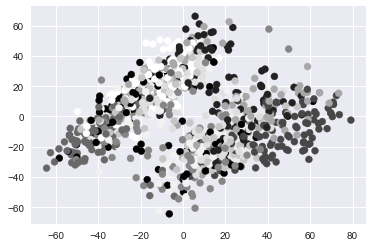

In [169]:
dec = PCA(n_components=2)
dec.fit(X)
vis = dec.fit_transform(X)
plt.scatter(vis[:,0], vis[:,1], c=y)

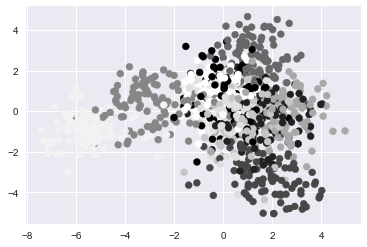

In [172]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X, y)
ld = lda.fit_transform(X, y)
plt.scatter(ld[:,0], ld[:,1], c=y)

** Confusion Matrix **

Confusion matrix, without normalization
[[2 0 2 2 1 0 0 1 0 2]
 [0 5 2 0 0 1 0 0 0 2]
 [0 0 4 2 1 0 0 1 0 1]
 [0 0 0 7 1 0 0 0 1 1]
 [0 0 3 1 2 0 0 2 3 0]
 [0 1 2 0 1 1 0 2 1 2]
 [1 0 0 1 1 0 6 0 0 1]
 [0 0 1 2 0 0 0 7 0 0]
 [0 0 0 0 1 0 0 3 6 0]
 [1 0 1 0 1 0 0 0 1 2]]
Normalized confusion matrix
[[ 0.2   0.    0.2   0.2   0.1   0.    0.    0.1   0.    0.2 ]
 [ 0.    0.5   0.2   0.    0.    0.1   0.    0.    0.    0.2 ]
 [ 0.    0.    0.44  0.22  0.11  0.    0.    0.11  0.    0.11]
 [ 0.    0.    0.    0.7   0.1   0.    0.    0.    0.1   0.1 ]
 [ 0.    0.    0.27  0.09  0.18  0.    0.    0.18  0.27  0.  ]
 [ 0.    0.1   0.2   0.    0.1   0.1   0.    0.2   0.1   0.2 ]
 [ 0.1   0.    0.    0.1   0.1   0.    0.6   0.    0.    0.1 ]
 [ 0.    0.    0.1   0.2   0.    0.    0.    0.7   0.    0.  ]
 [ 0.    0.    0.    0.    0.1   0.    0.    0.3   0.6   0.  ]
 [ 0.17  0.    0.17  0.    0.17  0.    0.    0.    0.17  0.33]]


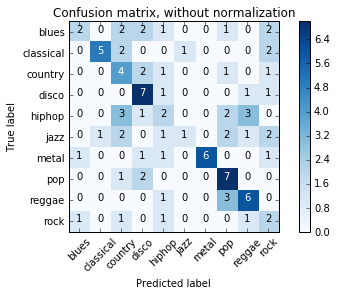

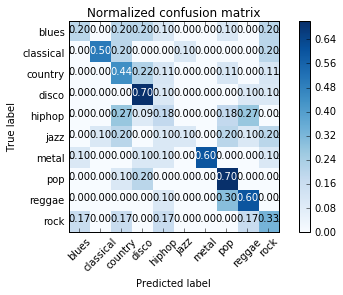

In [91]:
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

class_names = le.classes_

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()